# Разделение текстов по длинам предложений и слов

_начало тьюториала авторства А. Умнова_

Возмём пару текстов разных жанров и проверим гипотезу, что тексты этих двух жанров можно различать глядя на длину предложения и длину слова. Для начала разобьём всё на предложения.



Мы будем преобразовывать текст в кучу точек данных. Каждая точка данных состоит из нескольких чисел, в которых мы хотим отразить длину предложения и длину слова. Например:
* длина предложения, средняя длина слова
* длина предложения, длина данного слова (длина предложения повторяется для каждого слова из предложения)
* длина предложения, средняя длина, медиана, среднеквадратичное отклонение



In [1]:
import re
import numpy as np

with open('anna.txt', encoding='utf-8') as f:
    anna = f.read()
with open('sonets.txt', encoding='utf-8') as f:
    sonets = f.read()
    
anna_sentences = re.split(r'([.]\s*){3}|[.?!]', anna)
sonet_sentences = re.split(r'([.]\s*){3}|[.?!]', sonets)

print(len(anna_sentences))
print(None in anna_sentences)

42997
True




У нас получилось слишком много предложений и какие-то None. Дело вот в чём, что re.findall и re.split считают, что если в регулярном выражении есть что-то в скобках, то это непременно должно попасть в выдачу, ибо это что-то очень существенное (раз мы это разметили скобками!). findall в этом случае не выводит находку целиком, а выводит только содержимое скобок (всех, какие есть). split в этом случае бьёт текст на части, но между двумя соседними частями выводит содержимое каждой скобки, которая есть в выражении.

В нашем случае скобка не всегда оказывается с той стороны от |, чтобы в неё что-то попало, поэтому питон и вставляет None.

А лучше бы питон вообще не считал скобку как что-то особенное и только использовал её для ограничения области действия знаков. Такой тип скобок в питонских регулярных выражениях есть. Они открываются символом (?:, а закрываются символом ).


In [2]:
anna_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', anna)
sonet_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', sonets)
print(None in anna_sentences)
print(len(anna_sentences), len(sonet_sentences))


False
21499 1378




Так-то лучше. Теперь мы можем посчитать те данные, которые нам нужны для анализа:


In [3]:
def lenwords(sentence):
    return [len(word) for word in sentence.split()]

anna_sentlens = [lenwords(sentence) for sentence in anna_sentences if len(lenwords(sentence)) > 0]
sonet_sentlens = [lenwords(sentence) for sentence in sonet_sentences if len(lenwords(sentence)) > 0]
anna_data = [(len(sentence), np.mean(sentence), np.median(sentence), np.std(sentence)) 
             for sentence in anna_sentlens]
sonet_data = [(len(sentence), np.mean(sentence), np.median(sentence), np.std(sentence)) for 
              sentence in sonet_sentlens]

Если у нас всё в порядке, то данные должны выглядеть примерно так:

In [4]:
anna_data[:10]

[(25, 5.7599999999999998, 6.0, 3.0630703550522638),
 (5, 5.2000000000000002, 4.0, 3.2496153618543842),
 (25, 4.3200000000000003, 3.0, 4.8226133993924911),
 (18, 6.0555555555555554, 6.0, 3.9082849637692352),
 (32, 5.28125, 5.0, 3.0845823765138776),
 (12, 4.333333333333333, 4.0, 1.8408935028645437),
 (35, 5.5428571428571427, 5.0, 2.9601434052410092),
 (38, 4.4736842105263159, 5.0, 2.4998614920079825),
 (35, 4.8571428571428568, 5.0, 2.4858784839035661),
 (5, 3.3999999999999999, 3.0, 0.4898979485566356)]

Теперь хочется на данные посмотреть по-человечески. В этом нам помогут графики, которые очень здорово рисует matplotlib.

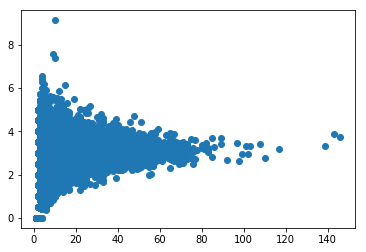

In [5]:
# в обычной консоли эта строка не нужна (только для ipython notebook)
%matplotlib inline

from matplotlib import pyplot as plt
anna_data = np.array(anna_data)
sonet_data = np.array(sonet_data)
plt.figure()
plt.plot(anna_data[:,0], anna_data[:,3], 'o')
plt.show()



Функция plot получает на вход массив значений по x, массив значений по y (они должны быть одинаковой длины, тогда каждая пара значений с одинаковым номером будет задавать точку на плоскости), и параметры рисования (необязательно). Самые популярные параметры:

* o – кружочки
* x – крестики
* l – линии (по умолчанию)
* r, g, b – красный, зелёный, синий

То есть мы нарисовали по X длину предложения в словах, по Y среднюю длину слова. Про matplotlib есть:

* [замечательнейший туториал](http://matplotlib.org/users/pyplot_tutorial.html) в виде кучи примеров с комментариями (ну и вообще горы документации)
* [небольшая галерея самых полезных примеров с исходниками и комментариями](http://matplotlib.org/gallery.html)
* [море примеров с комментариями](http://matplotlib.org/examples/index.html)
* и, конечно, ваш любимый поисковик с кучей ответов

Лучший способ добиться красивой картинки от matplotlib, как правило, в том, чтобы найти похожий на желаемое пример, а потом удалять из него всё лишнее до тех пор, пока он не рассыпется, а потом наполнить его своим содержимым.

Хочется нарисовать на одном графике и сонеты, и Анну Каренину, чтобы понять, насколько они друг на друга похожи или непохожи. Мы можем просто через запятую продолжать писать очередную пару комплектов координат и очередную настройку вида:


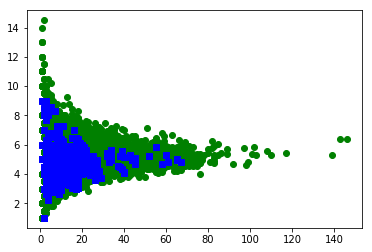

In [6]:
plt.figure()
c1, c2 = 0, 1
plt.plot(anna_data[:,c1], anna_data[:,c2], 'og', 
         sonet_data[:,c1], sonet_data[:,c2], 'sb')
plt.show()

Видим, что тексты слабо, но различимы по этой паре координат.

# Метод главных компонент, PCA

Суть этого преобразования очень простая. Мы пересекаем наше множество точек разными осями, и смотрим, вдоль какой оси, если на неё спроецировать наши данные, получается наибольшая дисперсия. И, когда мы такую ось нашли, мы берём её за первую ось новой системы отсчёта, строим ортогональную ей гиперплоскость, в которую проецируем данные, и повторяем эту процедуру, глядя на данные только в этой плоскости.

Если у нас данные трёхмерные, то аналогия этого процесса совсем наглядная. У нас есть точки в трёхмерном пространстве, которые описывают какую-то фигуру. Мы поворачиваем эту фигуру так, чтобы вдоль оси OX у неё была наибольшая дисперсия, вдоль OY наибольшая из оставшегося, вдоль OZ наименьшая. То есть мы заходим к данным с такого бока, чтобы они были всегда шире, чем выше, чем глубже.

In [7]:
from matplotlib import mlab
p = mlab.PCA(anna_data, True)

Результат регрессии оказывается в p.Y. Мы можем нарисовать первые две оси из неё:

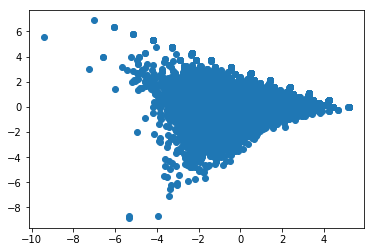

In [8]:
plt.plot(p.Y[:,0], p.Y[:,1], 'o')

Теперь добавим к нашим данным сонеты и разложим на главные компоненты все вместе. Необходимо все данные объединять в одну матрицу, чтобы результаты преобразования для первого и второго корпуса были сравнимы.

In [9]:
data = np.vstack((anna_data, sonet_data))
p = mlab.PCA(data, True)
N = len(anna_data)

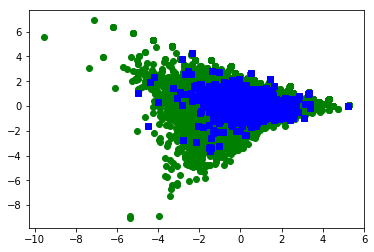

In [10]:
plt.plot(p.Y[:N,0], p.Y[:N,1], 'og', p.Y[N:,0], p.Y[N:,1], 'sb')

Видим, что метод главных компонент не очень помог нам лучше различать предложения из разных корпусов. Давайте придумаем другие фичи. Что насчет числа частей речи в предложении?

Analyzing corpus1 Fri Jan 27 00:39:16 2017
Analyzing corpus2 Fri Jan 27 00:39:46 2017
PCA and drawing Fri Jan 27 00:39:48 2017


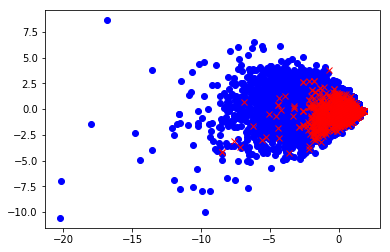

In [11]:
import time
from pymystem3 import Mystem
m = Mystem()

def mystem(sentence):
    sentence = sentence.strip()
    anas = m.analyze(sentence)
    return anas

def nouns(analysis):
    try:
        return len([w for w in analysis if 'S,' in w['analysis'][0]['gr']])
    except:
        return 0

def adjectives(analysis):
    try:
        return len([w for w in analysis if 'A=' in w['analysis'][0]['gr']])
    except:
        return 0

def verbs(analysis):
    try:
        return len([w for w in analysis if 'V,' in w['analysis'][0]['gr']])
    except:
        return 0

def adverbs(analysis):
    try:
        return len([w for w in analysis if 'ADV=' in w['analysis'][0]['gr']])
    except:
        return 0

def pronouns(analysis):
    try:
        return len([w for w in analysis if 'PRO' in w['analysis'][0]['gr']])
    except:
        return 0

corp1_data = []
corp2_data = []    

print('Analyzing corpus1', time.asctime())
for sent in anna_sentences:
    ana = mystem(sent)
    ana = [analysis for analysis in ana if 'analysis' in analysis.keys() and analysis['analysis'] != []]
    corp1_data.append([adjectives(ana), nouns(ana), verbs(ana), adverbs(ana), pronouns(ana)])

print('Analyzing corpus2', time.asctime())
for sent in sonet_sentences:
    ana = mystem(sent)
    ana = [analysis for analysis in ana if 'analysis' in analysis.keys() and analysis['analysis'] != []]
    corp2_data.append([adjectives(ana), nouns(ana), verbs(ana), adverbs(ana), pronouns(ana)])

print('PCA and drawing', time.asctime())
corp1_data = np.array(corp1_data)
corp2_data = np.array(corp2_data)
data = np.vstack((corp1_data, corp2_data))
p = mlab.PCA(data)
N = len(corp1_data)
plt.figure()
plt.plot(p.Y[:N, 0], p.Y[:N, 1], 'ob', p.Y[N:, 0], p.Y[N:, 1], 'xr')

Видим, что опять не очень получается, но куда деваться. Давайте остановимся на этих фичах - частях речи - и попытаемся научиться классифицировать предложение (относить его либо к "Анне Карениной", либо к сонетам), основываясь на его признаках.

Машинное обучение в python осуществляется при помощи библиотеки scikitlearn, она же sklearn.

Подробнее [здесь](http://www.scikit-learn.org/). 

Читаем тексты, все для них считаем, объединяем в одну матрицу.

In [12]:
import re
import numpy as np
from sklearn import grid_search, svm
from pymystem3 import Mystem
m = Mystem()

def mystem(sentence):
    sentence = sentence.strip()
    anas = m.analyze(sentence)
    return anas

def nouns(analysis):
    try:
        return len([w for w in analysis if 'S,' in w['analysis'][0]['gr']])
    except:
        return 0

def adjectives(analysis):
    try:
        return len([w for w in analysis if 'A=' in w['analysis'][0]['gr']])
    except:
        return 0

def verbs(analysis):
    try:
        return len([w for w in analysis if 'V,' in w['analysis'][0]['gr']])
    except:
        return 0

def adverbs(analysis):
    try:
        return len([w for w in analysis if 'ADV=' in w['analysis'][0]['gr']])
    except:
        return 0

def pronouns(analysis):
    try:
        return len([w for w in analysis if 'PRO' in w['analysis'][0]['gr']])
    except:
        return 0

def prepositions(analysis):
    try:
        return len([w for w in analysis if 'PR=' in w['analysis'][0]['gr']])
    except:
        return 0

with open('sonets.txt', 'r', encoding='utf-8') as f:
    corp1 = f.read()
with open('anna.txt', encoding='utf-8') as f:
    corp2 = f.read()

corp1_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', corp1)
corp2_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', corp2)
corp1_data = []
corp2_data = []

print('Processing corp1...')
for sent in corp1_sentences:
    ana = mystem(sent)
    ana = [analysis for analysis in ana if 'analysis' in analysis.keys() and analysis['analysis'] != []]
    corp1_data.append([1, adjectives(ana), nouns(ana), verbs(ana), adverbs(ana), pronouns(ana), prepositions(ana)])
print('Processing corp2...')
for sent in corp2_sentences:
    ana = mystem(sent)
    ana = [analysis for analysis in ana if 'analysis' in analysis.keys() and analysis['analysis'] != []]
    corp2_data.append([2, adjectives(ana), nouns(ana), verbs(ana), adverbs(ana), pronouns(ana), prepositions(ana)])

corp1_data = np.array(corp1_data)
corp2_data = np.array(corp2_data)
data = np.vstack((corp1_data, corp2_data))

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Processing corp1...
Processing corp2...


Мы хотим построить такой классификатор, который решал бы нашу задачу наилучшим образом. Но есть одна проблема: алгоритмы машинного обучения очень сложные, у них много параметров, от которых зависит, как себя поведет алгоритм. И параметры, которые подойдут к нашим конкретным данным, мы заранее не знаем.

Однако можно использовать перебор, который натренирует нам классификаторы с разными параметрами, все их протестирует, выберет лучший и любезно нам это сообщит. В scikitlearn перебор называется grid_search и располагается в одноименном модуле.

In [13]:
parameters = {'C': (.1, .5, 1.0, 1.5, 1.7, 2.0)}
gs = grid_search.GridSearchCV(svm.LinearSVC(), parameters)
gs.fit(data[:, 1:], data[:, 0])
print('Best result is ',gs.best_score_)
print('Best C is', gs.best_estimator_.C)

Best result is  0.9397211172793636
Best C is 0.1


В parameters я указываю те параметры, которые буду перебирать. В grid_search.GridSearchCV я вызываю классификатор определнного типа. Затем я тренирую свой перебор на всех имеющихся у меня данных. Каждый классификатор grid_search оценивает при помощи кросс-валидации.

После этого можно распечатать, какая была наибольшая accuracy и какой коэффициент оказался наилучшим.

Теперь мы берем наш лучший классификатор и снова тренируем его, но уже на половине данных. Вторую половину используем для тестирования.

In [14]:
clf = svm.LinearSVC(C=gs.best_estimator_.C)
clf.fit(data[::2, 1:], data[::2, 0])

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Метод fit() осуществляет как раз таки обучение нашей модели на тех данных, которые мы ей передали. Важно! Не передавайте модели ответы :)

Теперь будем давать нашему алгоритмы данные из второй половины и просить его предсказать, к какому классу относится наше предложение. Если предсказание неправильное, нужно это распечатать!

In [ ]:
wrong = 0
for obj in data[1::2, :]:
    label = clf.predict(obj[1:])
    if label != obj[0] and wrong < 3:
        print('Пример ошибки машины: class = ', obj[0], ', label = ', label, ', экземпляр ', obj[1:])
        wrong += 1
    if wrong > 3:
        break

Ещё очень хорошие тьюториалы:

* http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
* http://fa.bianp.net/talks/ns_2011/ (только нужно везде вместо scikits.learn писать sklearn)
* https://bugra.github.io/work/notes/2014-12-26/language-detector-via-scikit-learn/
* http://radimrehurek.com/data_science_python/